In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing a dataset using pandas

In [55]:
white_wine_df = pd.read_csv("winequality-white.csv", sep=";")

white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [56]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### <center> Data Visualization and Exploration</center>

In [57]:
white_wine_df.describe().T #Some descriptive 

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In the next cell we will perfom a function to determine the skewness and the Kurtosis of each predictor variables to gain an insight on how heavily the tails of a distribution differ from the tails of a normal distribution and how the varaibles are skewed.

For Kurtosis:
- When kurtosis increases (>3), we can visualize a thin "bell" with a high peak, whereas when kurtosis decreases, the peak broadens and the tails thicken.

Skewness: 
- Generally, data in thebrange of (-0.5 t0 0.5) are fairly symmetrical.
- The data are moderately skewed if the skewness is between -1 and -0.5 or between 0.5 and 1.
- Unless the skewness is greater than 1 or less than -1, the data are highly skewed.

In [89]:
# white_wine_df.drop(columns=["quality"], inplace=False).skew(axis=0)

print("Skewness of the Dataset: \n",white_wine_df.drop(columns=["quality"], inplace=False).skew())
print("\nKurtosis\n",white_wine_df.drop(columns=["quality"], inplace=False).kurt())

Skewness of the Dataset: 
 fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
dtype: float64

Kurtosis
 fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
dtype: float64


Seeing numbers only may be exhausting thus, i will add the histograms to show the distributions graphically that corresponds with the values obtained from the table above.

> The results from the Distibutions show: <br>
    - All the variables are Unimodial <br>
    - Most variables seem to be Normally(or Approximately Normally) distributed from the results  except for ***residual sugar and alcohol*** <br>

The visualisation, corresponds with the results obtained previously for Skewness and Kurtosis.

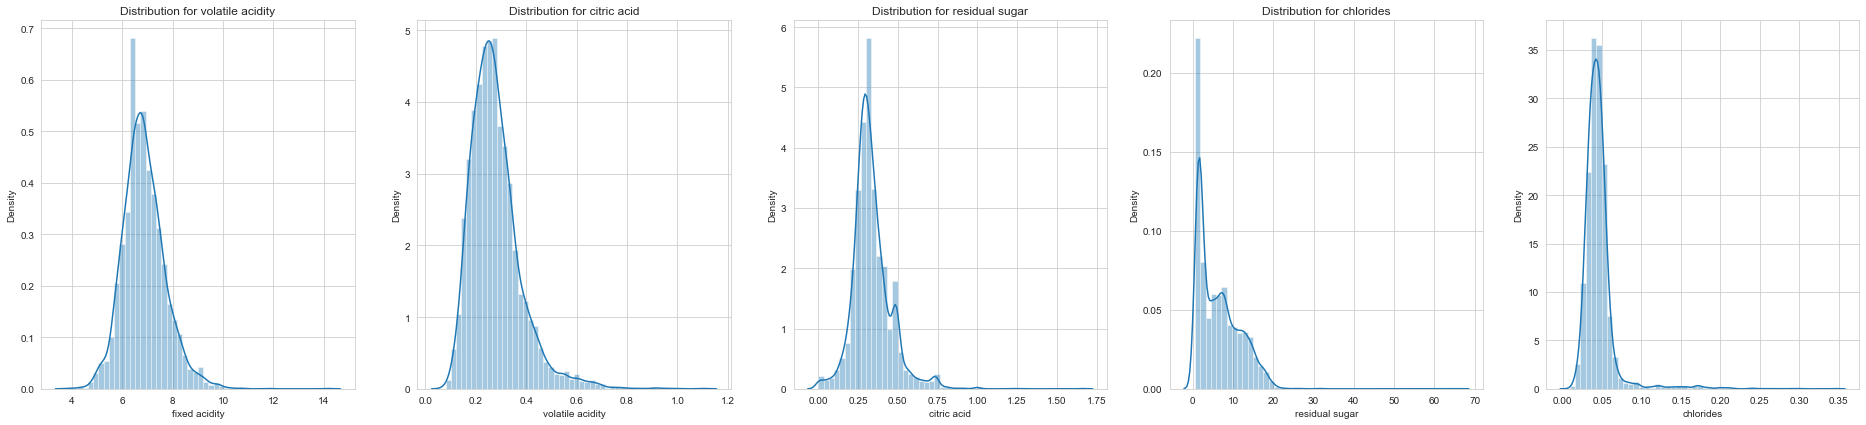

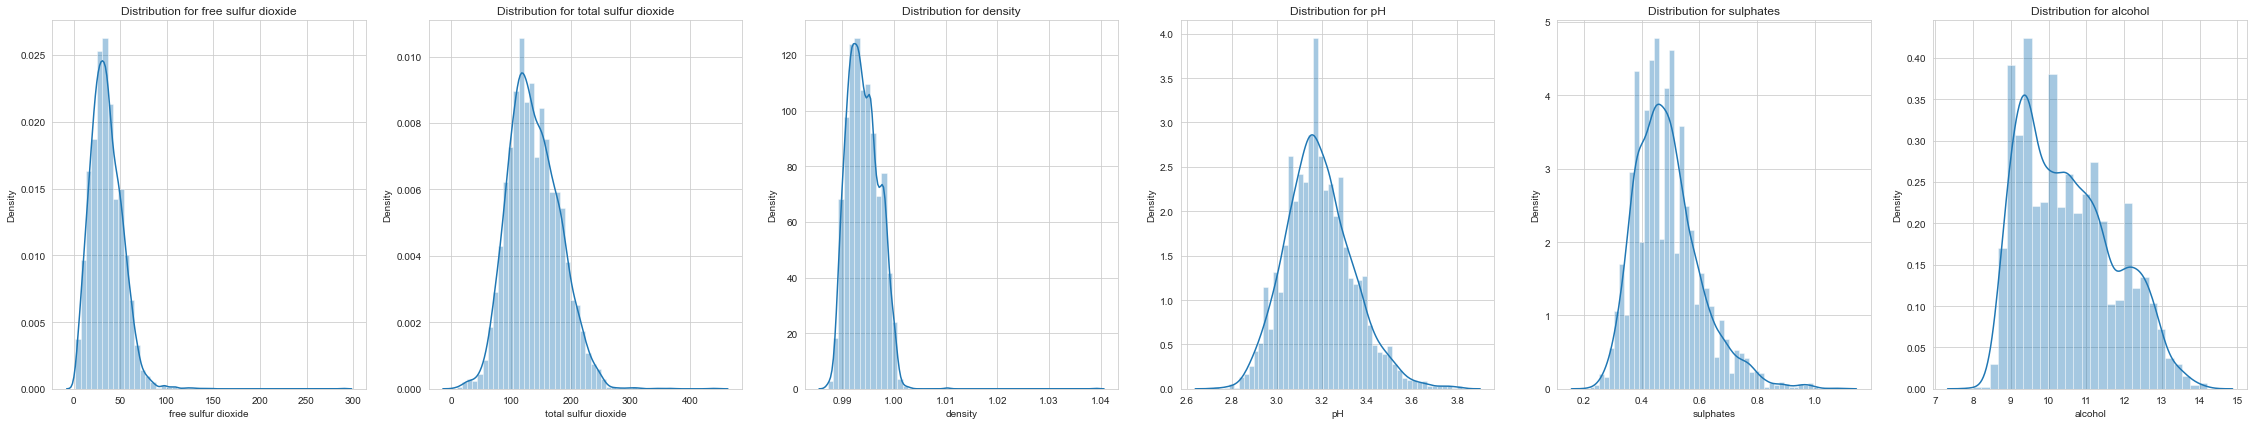

In [83]:
explanatory_vars = white_wine_df.drop(columns=["quality"]).columns.values

#1st Figure
plt.figure(figsize=(100,80))
for i in range(0,len(explanatory_vars)-6):
    plt.title(f"Distribution for {explanatory_vars[i]}")
    plt.subplot(10,15,i+1)
    sns.distplot(white_wine_df[explanatory_vars[i]],kde=True) 

#2nd Figure
plt.figure(figsize=(100,80))
for i in range(len(explanatory_vars)-6,len(explanatory_vars)):

    plt.subplot(10,15,i+1)
    sns.distplot(white_wine_df[explanatory_vars[i]],kde=True) 
    plt.title(f"Distribution for {explanatory_vars[i]}")

Contructing a heatmap for checking multicollinerity among the predictor variables and correlation between the predictor variables and the response variables

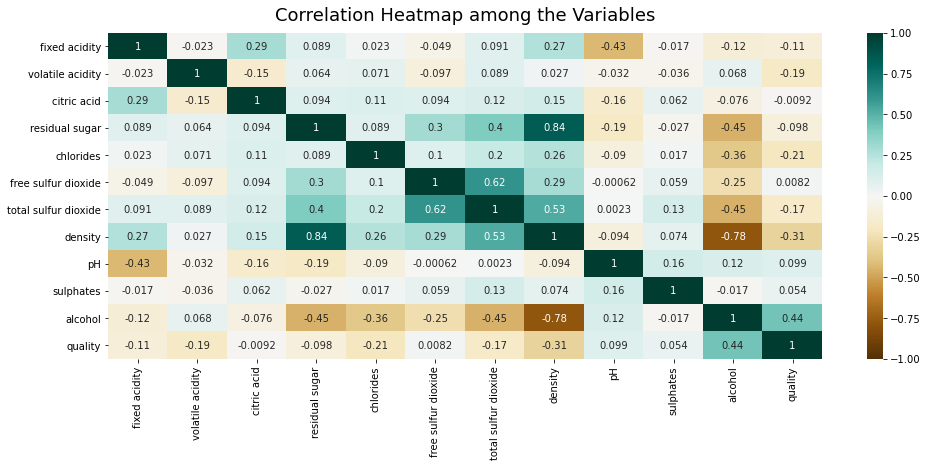

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(white_wine_df.corr(), annot=True, cmap='BrBG',vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap among the Variables', fontdict={'fontsize':18}, pad=12)
plt.show()

To have a strong argument for with regards to the correlation of this dataset, we will further more apply more diagostics procedures to test for high correlation in the predictor variables

Some variables show Multicollinearity, i will then determing the Variance Inflation Factor(VIF) for each predictor variable
The varibales VIF's are all more than 4 which shows that there is High correlation among them, thus removing all the variables would not be helpful as there will be no point of modelling the data.

Other Remedies(Polynomial Features, Interaction(Combinations $X_1X_2X$)
  and so on and so forth)) Features can perfomed to this problem except the one for removing thr features that are highly correlated.However, applying these will be irrelavent to this assignemt but it would be useful.

In [ ]:
X = white_wine_df.drop("quality",axis = 1)
y = white_wine_df["quality"]

from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF["Features"] = X.columns

VIF["VIF_value"] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
VIF


,Features,VIF_value
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


it is clear that the variables show correlation, removing the variables would not be a good practise as all of the variables show correlation among themselves. Thus, removing the correlated will cost the data and we may lose important information. Howerever, we futher determined the importane of each of the variable in the wine quality using the **random forest** which gave us a reason not to delete/remove the variables. 

> The figure shows that ***Alcohol, volatile acidity and free sulfur dioxide***	are the most contribyuting features to the model


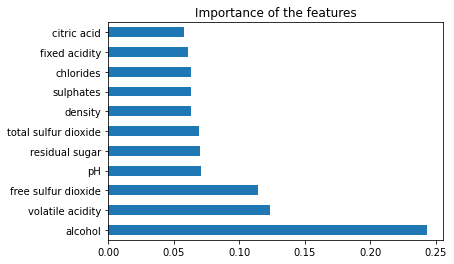

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# define dataset
X_random = white_wine_df.drop(["quality"],axis=1)
y_random = white_wine_df["quality"]


#define the model
model = RandomForestRegressor()
# # fit the model
model.fit(X_random, y_random)
# # get importance
importance = model.feature_importances_

(pd.Series(model.feature_importances_, index=X_random.columns)
   .nlargest(len(X_random.columns))
   .plot(kind='barh')) 
plt.title("Importance of the features")
plt.show()
	

We then used a boxplot to detect outliers from the dataset. 

> **variabels that have outliers** : <br>
    > - citric acid <br>
    > - free sulfur dioxide <br>
    > - density <br>
    > - total sulfur dioxide <br>
    > - fixed acidity	<br>

Though the other ones(features) may show somr points as outliers, we did not consider them as they were close to the other points.

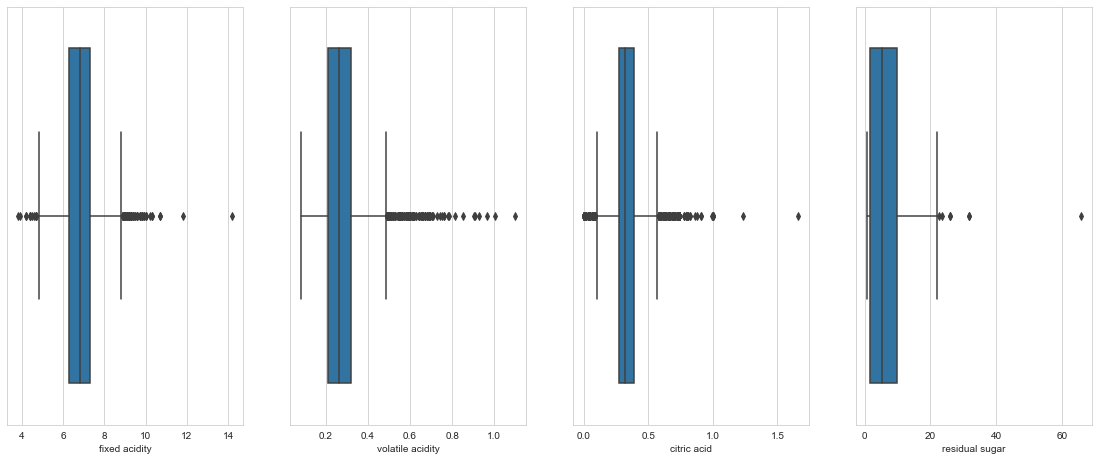

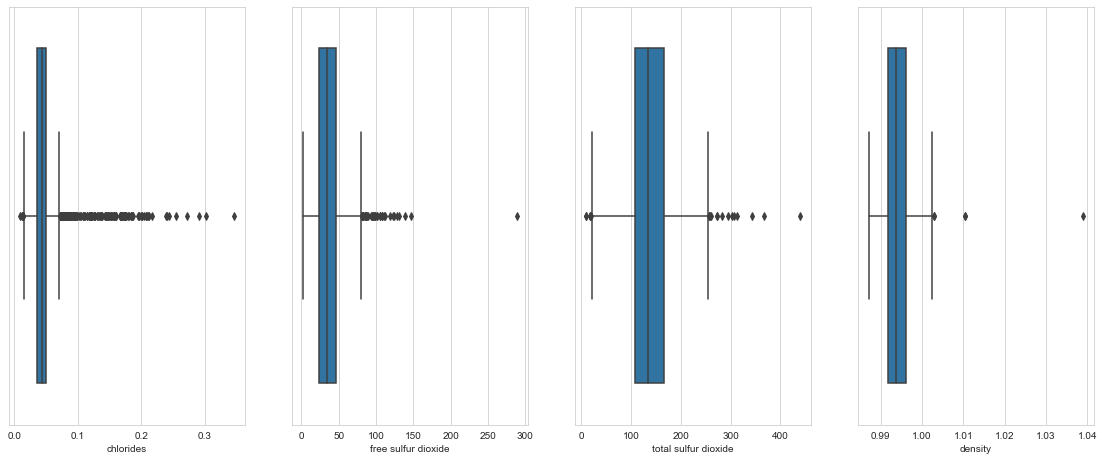

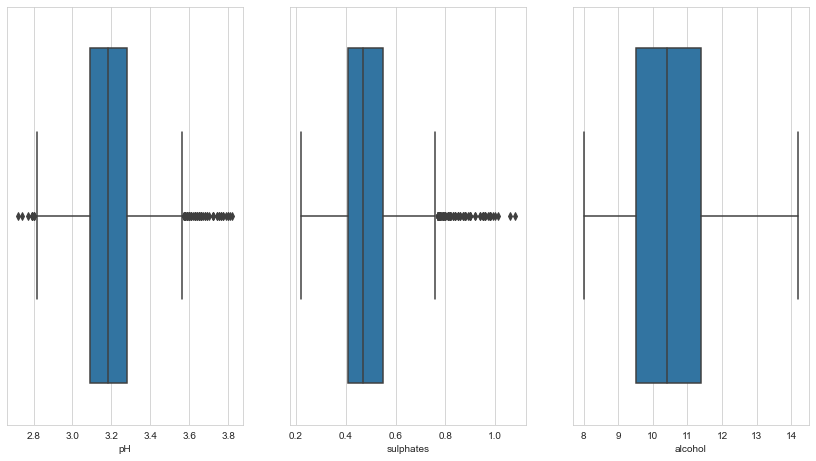

In [ ]:
explanatory_vars = white_wine_df.drop(columns=["quality"]).columns.values #Not plotting outliers for the response variable because it's class variable
cols_no=12
rows_no = len(explanatory_vars )-1/cols_no

#First figure
plt.figure(figsize=(60,100))
for i in range(0,len(explanatory_vars )-7):
    plt.subplot(rows_no + 0.5,cols_no,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(white_wine_df[explanatory_vars[i]])


#2ndvfigure
plt.figure(figsize=(60,100))
for i in range(len(explanatory_vars )-7,len(explanatory_vars)-3):
    plt.subplot(rows_no + 0.5,cols_no,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(white_wine_df[explanatory_vars [i]])


#3rd figure ()
plt.figure(figsize=(60,100))
for i in range(len(explanatory_vars )-3,len(explanatory_vars )):
    plt.subplot(rows_no + 0.5,cols_no,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(white_wine_df[explanatory_vars [i]])